In [1]:
import os

print(os.environ['DATA_DIR'])

root_data_dir = os.environ['DATA_DIR']
os.listdir(os.environ['DATA_DIR'])

/Users/username/PycharmProjects/ml_for_products/data


['bidmachine_task_data', 'bidmachine_logs.zip']

In [2]:
train_data_dir = os.path.join(root_data_dir, 'bidmachine_task_data')
os.listdir(train_data_dir)

['__MACOSX', 'train_data.csv', 'test_data.csv']

In [3]:
# from IPython.display import clear_output

# !pip install catboost seaborn
# clear_output()


In [4]:
import pandas as pd

train_df = pd.read_csv(os.path.join(train_data_dir, 'train_data.csv'), nrows=1000)

train_df.head()

,target,flr,sellerClearPrice,hour,ssp,dsp,auctionBidFloorSource,sdk,sdkver,bundle,...,region,request_context_device_w,request_context_device_h,bidderFlrPolicy,adt,dc,contype,request_context_device_type,ifa,price
0,0,1.651717,1.227061,0,157,80,rollouts,BidMachine,2.4.0.2,gAAAAABmcEFTEPcMMU786QLAISLs22JucTR9XWAoRq7NAM...,...,nc,834,1194,ascending auction,interstitial,US,2,5,NaN,1.651717
1,0,5.388000,5.709376,3,157,80,rollouts,BidMachine,2.4.0.2,gAAAAABmcEFTEPcMMU786QLAISLs22JucTR9XWAoRq7NAM...,...,sc,390,844,original,interstitial,US,2,4,NaN,7.685255
2,0,1.010250,1.728341,8,157,80,rollouts,BidMachine,2.4.0.2,gAAAAABmcEFTEPcMMU786QLAISLs22JucTR9XWAoRq7NAM...,...,nv,393,852,original,interstitial,US,2,4,NaN,2.326478
3,0,0.741433,0.547470,12,157,80,rollouts,BidMachine,2.4.0.2,gAAAAABmcEFTEPcMMU786QLAISLs22JucTR9XWAoRq7NAM...,...,coa,414,896,ascending auction,interstitial,US,2,4,NaN,0.756278
4,0,1.010250,1.721669,0,157,80,rollouts,BidMachine,2.4.0.2,gAAAAABmcEFTEPcMMU786QLAISLs22JucTR9XWAoRq7NAM...,...,il,414,896,original,interstitial,US,2,4,E30F6295-BCBC-4BD2-A1C4-2198F1EA38F2,2.317498


In [5]:
train_df['target'].value_counts(normalize=True)

target
0    0.981
1    0.019
Name: proportion, dtype: float64

In [15]:
train_df.columns

Index(['target', 'flr', 'sellerClearPrice', 'hour', 'ssp', 'dsp',
       'auctionBidFloorSource', 'sdk', 'sdkver', 'bundle', 'os', 'lang',
       'country', 'region', 'request_context_device_w',
       'request_context_device_h', 'bidderFlrPolicy', 'adt', 'dc', 'contype',
       'request_context_device_type', 'ifa', 'price'],
      dtype='object')

In [7]:
train_df.describe()

,target,flr,sellerClearPrice,hour,ssp,dsp,request_context_device_w,request_context_device_h,contype,request_context_device_type,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.019000,2.525469,2.713013,11.328000,157.0,78.826000,639.792000,1247.998000,2.500000,4.205000,3.567206
std,0.136593,5.878980,4.739086,7.807007,0.0,26.458756,278.584199,555.673767,1.182962,0.403904,6.354854
min,0.000000,0.010000,0.026283,0.000000,157.0,41.000000,320.000000,568.000000,2.000000,4.000000,0.027666
25%,0.000000,0.691500,0.766361,3.000000,157.0,80.000000,390.000000,844.000000,2.000000,4.000000,1.010250
50%,0.000000,1.107266,1.521529,12.000000,157.0,80.000000,430.000000,932.000000,2.000000,4.000000,1.981744
75%,0.000000,3.105345,3.347819,18.250000,157.0,80.000000,810.000000,1600.000000,2.000000,4.000000,4.462007
max,1.000000,161.849300,124.300900,23.000000,157.0,227.000000,1812.000000,2712.000000,7.000000,5.000000,167.318500


In [13]:
def get_valuable_columns(input_df):
    col_subset = []
    for col in input_df.columns:
        try:
            most_frequent_value_count = input_df[col].value_counts().iloc[0]
            total_rows = len(input_df)
            if most_frequent_value_count / total_rows <= 0.95:
                col_subset.append(col)
        except (TypeError, IndexError):
            # Ignore columns that can't be analyzed (e.g. mixed data types)
            pass
    return col_subset

columns_subset = get_valuable_columns(train_df)

columns_subset

['flr',
 'sellerClearPrice',
 'hour',
 'dsp',
 'auctionBidFloorSource',
 'sdkver',
 'bundle',
 'os',
 'lang',
 'country',
 'region',
 'request_context_device_w',
 'request_context_device_h',
 'bidderFlrPolicy',
 'contype',
 'request_context_device_type',
 'ifa',
 'price']

In [14]:
cat_candidates = ['request_context_device_type', 'dsp', 'ssp', 'hour']

features = {
    'cat': [col for col in cat_candidates if col in columns_subset],
    'num': ['price', ]
}

features

{'cat': ['request_context_device_type', 'dsp', 'hour'], 'num': ['price']}

In [19]:
features_set = features['cat'] + features['num']
X = train_df[features_set]
y = train_df['target']

In [16]:
from catboost import Pool, CatBoostClassifier

from IPython.display import clear_output

model = CatBoostClassifier(**{
    'loss_function': 'CrossEntropy', 'boosting_type': 'Plain',
    'bootstrap_type': 'Bernoulli', 'n_estimators': 150
})

train_pool = Pool(data=X, label=y, cat_features=features['cat'])
model.fit(train_pool)
clear_output()
print(f'Model trained: {model}')

Model trained: <catboost.core.CatBoostClassifier object at 0x12a5ca750>


In [25]:
model_path = os.path.join(root_data_dir, 'model.cb')

model.save_model(model_path)
print(f'model saved to {model_path}')

model saved to /Users/username/PycharmProjects/ml_for_products/data/model.cb


Home work

* add train.py
* 

In [20]:
f_imp_df = pd.DataFrame({
    'Feature': features_set,
    'Importance': model.get_feature_importance(train_pool)
}).sort_values(by='Importance', ascending=False)

f_imp_df.head()

,Feature,Importance
1,dsp,47.266439
3,price,41.366352
0,request_context_device_type,10.174206
2,hour,1.193003


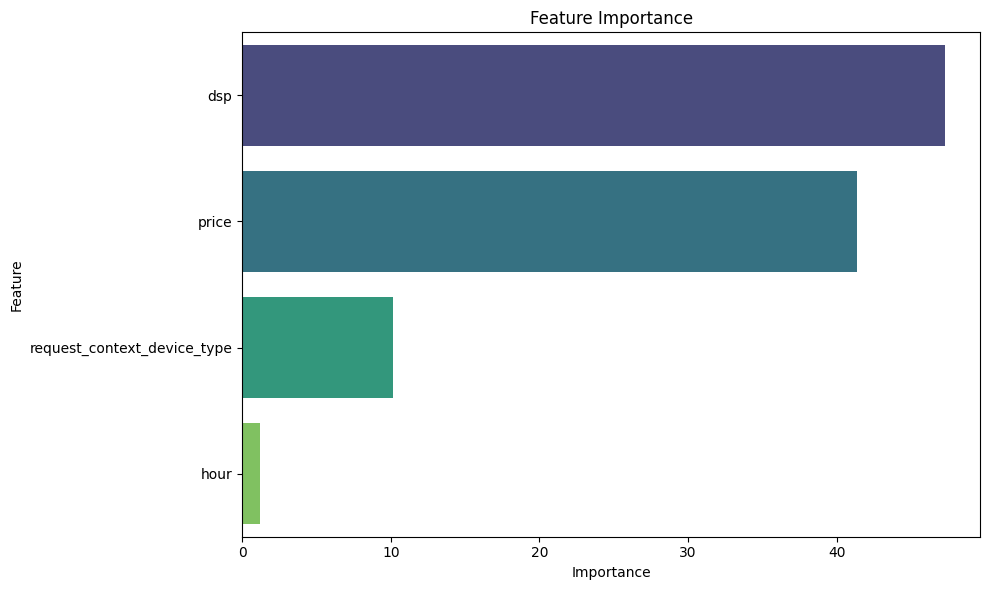

In [24]:
from matplotlib import pyplot as plt

import seaborn as sns

def plot_feature_importances(feature_importances, output_file=None):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importances, palette='viridis', dodge=False)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file)
        print(f"Plot saved to {output_file}")
    else:
        plt.show()
plot_feature_importances(f_imp_df)

# Inference

In [28]:
inference_df = pd.read_csv(os.path.join(train_data_dir, 'test_data.csv'), nrows=1000)
X_inference = inference_df[features_set]

valid_pool = Pool(data=X_inference, cat_features=features['cat'])
valid_pool

In [37]:
predicted_scores = model.predict_proba(valid_pool)
inference_df['score'] = predicted_scores[:, 1]

inference_df.groupby('ssp').agg(mean_score = ('score', 'mean')).sort_values(by='mean_score', ascending=False)

,mean_score
ssp,
157,0.098131


In [ ]:

import plotly.express as px

def plot_hist(filtered_df, metric_name='timedelta_seconds'):
    fig = px.histogram(
        filtered_df, x=metric_name, nbins=10,
        labels={metric_name: f'Title: {metric_name}'},
        title=f'Histogram of {metric_name}'
    )
    fig.show()